(sec:pandas10min_1)=
# 판다스 10분 완성 1부


판다스 초보자들을 위한 판다스 기초 내용을 다룬다.
여기서 다루는 배용은 [판다스 요리책](https://pandas.pydata.org/docs/user_guide/cookbook.html#cookbook)을 
많이 참고한다.

**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 객체 생성

참고: [판다스 자료구조](https://pandas.pydata.org/docs/user_guide/dsintro.html#dsintro)

**시리즈 객체 생성**

리스트를 이용하여 시리즈를 생성할 수 있다.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

**데이터프레임 객체 생성**

방식 1: 2차원 어레이, 인덱스 라벨, 열 라벨을 지정하여 데이터프레임을 생성할 수 있다.

- 인덱스 라벨: 날짜시간(`datetime`) 인덱스 이용

In [3]:
dates = pd.date_range(start="20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨은 A, B, C, D로 지정

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

A         B         C         D
2013-01-01 -0.134976  0.133250 -1.069917 -0.472861
2013-01-02  1.639058 -1.652802  0.449361 -0.692437
2013-01-03  0.377214  1.337480 -1.270051 -0.177072
2013-01-04  0.528188  0.410219 -1.134660 -0.395528
2013-01-05 -0.484987  0.844055  1.245165  0.576447
2013-01-06  1.618433 -0.942135  1.553922 -0.330317

방식 2: 사전 객체를 이용할 수도 있다.
- 사전의 키; 열 라벨
- 인덱스 라벨: 정수 인덱스 자동 지정

In [5]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

열별로 다른 자료형이 사용될 수 있다.

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 데이터 살펴보기

참고: [데이터프레임 핵심 기초](https://pandas.pydata.org/docs/user_guide/basics.html#basics)

- 처음 5행 확인

In [7]:
df.head()

A         B         C         D
2013-01-01 -0.134976  0.133250 -1.069917 -0.472861
2013-01-02  1.639058 -1.652802  0.449361 -0.692437
2013-01-03  0.377214  1.337480 -1.270051 -0.177072
2013-01-04  0.528188  0.410219 -1.134660 -0.395528
2013-01-05 -0.484987  0.844055  1.245165  0.576447

- 끝에서 3행 확인

In [8]:
df.tail(3)

A         B         C         D
2013-01-04  0.528188  0.410219 -1.134660 -0.395528
2013-01-05 -0.484987  0.844055  1.245165  0.576447
2013-01-06  1.618433 -0.942135  1.553922 -0.330317

- 인덱스 라벨 확인

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

- 열 라벨 확인

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

- 넘파이 어레이로 변환: 인덱스 라벨과 열 라벨 정보 삭제

In [11]:
df.to_numpy()

array([[-0.13497559,  0.13325027, -1.06991662, -0.47286057],
       [ 1.63905768, -1.65280192,  0.44936097, -0.6924373 ],
       [ 0.377214  ,  1.33747966, -1.27005076, -0.17707215],
       [ 0.52818794,  0.41021909, -1.13465988, -0.39552784],
       [-0.48498725,  0.84405535,  1.24516458,  0.57644708],
       [ 1.61843291, -0.94213545,  1.55392225, -0.33031734]])

- 열별 자료형이 통일되지 않은 경우: `object`로 통일된 자료형 사용. 시간 소요.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

- 수치형 데이터의 분포 확인

In [13]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.590488  0.021678 -0.037697 -0.248628
std    0.881871  1.122842  1.280915  0.438490
min   -0.484987 -1.652802 -1.270051 -0.692437
25%   -0.006928 -0.673289 -1.118474 -0.453527
50%    0.452701  0.271735 -0.310278 -0.362923
75%    1.345872  0.735596  1.046214 -0.215383
max    1.639058  1.337480  1.553922  0.576447

- 전치 데이터프레임

In [14]:
df.T

2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.134976    1.639058    0.377214    0.528188   -0.484987    1.618433
B    0.133250   -1.652802    1.337480    0.410219    0.844055   -0.942135
C   -1.069917    0.449361   -1.270051   -1.134660    1.245165    1.553922
D   -0.472861   -0.692437   -0.177072   -0.395528    0.576447   -0.330317

- 열 라벨 내림차순 정렬

In [15]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2013-01-01 -0.472861 -1.069917  0.133250 -0.134976
2013-01-02 -0.692437  0.449361 -1.652802  1.639058
2013-01-03 -0.177072 -1.270051  1.337480  0.377214
2013-01-04 -0.395528 -1.134660  0.410219  0.528188
2013-01-05  0.576447  1.245165  0.844055 -0.484987
2013-01-06 -0.330317  1.553922 -0.942135  1.618433

- 특정 열의 값을 기준으로 행 정렬

In [16]:
df.sort_values(by='B')

A         B         C         D
2013-01-02  1.639058 -1.652802  0.449361 -0.692437
2013-01-06  1.618433 -0.942135  1.553922 -0.330317
2013-01-01 -0.134976  0.133250 -1.069917 -0.472861
2013-01-04  0.528188  0.410219 -1.134660 -0.395528
2013-01-05 -0.484987  0.844055  1.245165  0.576447
2013-01-03  0.377214  1.337480 -1.270051 -0.177072

## 인덱싱/슬라이싱

In [17]:
type(pd.core.indexing._LocIndexer)

type

In [18]:
type(abs)

builtin_function_or_method

In [19]:
np.r_

In [20]:
type(np.c_)

numpy.lib.index_tricks.CClass

권장 사항: 넘파이 어레이의 인덱싱, 슬라이싱 방식보다 아래 방식 권장됨. 보다 효율적이고 빠름.

- [`DataFrame.at[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at)
- [`DataFrame.iat[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html#pandas.DataFrame.iat)
- [`DataFrame.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html#pandas.DataFrame.loc)
- [`DataFrame.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc)

참고

- [Indexing and Selecting Data](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing)
- [MultiIndex / Advanced Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced)

### 열 선택

열 라벨을 이용한 인덱싱. 시리즈 생성.

In [21]:
df["A"]

2013-01-01   -0.134976
2013-01-02    1.639058
2013-01-03    0.377214
2013-01-04    0.528188
2013-01-05   -0.484987
2013-01-06    1.618433
Freq: D, Name: A, dtype: float64

객체의 속성처럼 이용하는 방식도 가능.

In [22]:
df.A

2013-01-01   -0.134976
2013-01-02    1.639058
2013-01-03    0.377214
2013-01-04    0.528188
2013-01-05   -0.484987
2013-01-06    1.618433
Freq: D, Name: A, dtype: float64

### 행 슬라이싱

정수 인덱스 활용. 데이터프레임 생성

In [23]:
df[0:3]

A         B         C         D
2013-01-01 -0.134976  0.133250 -1.069917 -0.472861
2013-01-02  1.639058 -1.652802  0.449361 -0.692437
2013-01-03  0.377214  1.337480 -1.270051 -0.177072

인덱스 라벨 활용. 정수 인덱스 방식과 조금 다름.

In [24]:
df["20130101":"20130103"]

A         B         C         D
2013-01-01 -0.134976  0.133250 -1.069917 -0.472861
2013-01-02  1.639058 -1.652802  0.449361 -0.692437
2013-01-03  0.377214  1.337480 -1.270051 -0.177072

### `loc[]`: 라벨 활용 인덱싱/슬라이싱

인덱스 라벨을 이용하면 열 라벨을 인덱스로 사용하는 시리즈가 생성된다.

In [25]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [26]:
df.loc[dates[0]]

A   -0.134976
B    0.133250
C   -1.069917
D   -0.472861
Name: 2013-01-01 00:00:00, dtype: float64

축 활용. 행과 열에 대한 인덱싱/슬라이싱 동시에 지정.

- `A`, `B` 두 열만 추출.

In [27]:
df.loc[:, ["A", "B"]]

A         B
2013-01-01 -0.134976  0.133250
2013-01-02  1.639058 -1.652802
2013-01-03  0.377214  1.337480
2013-01-04  0.528188  0.410219
2013-01-05 -0.484987  0.844055
2013-01-06  1.618433 -0.942135

- 특정 행만 대상으로 `A`, `B` 두 열 추출

In [28]:
df.loc["20130102":"20130104", ["A", "B"]]

A         B
2013-01-02  1.639058 -1.652802
2013-01-03  0.377214  1.337480
2013-01-04  0.528188  0.410219

인덱싱이 사용되면 차원이 줄어듦.

In [29]:
df.loc["20130102", ["A", "B"]]

A    1.639058
B   -1.652802
Name: 2013-01-02 00:00:00, dtype: float64

두 개의 인덱싱은 결국 하나의 상수(스칼라) 생성.

In [30]:
df.loc[dates[0], "A"]

-0.13497559406557705

하나의 항목을 선택할 때 `at` 함수 사용.

In [31]:
df.at[dates[0], "A"]

-0.13497559406557705

### `iloc[]`: 정수 인덱스 활용 인뎅식/슬라이싱

행 선택

In [32]:
df.iloc[3]

A    0.528188
B    0.410219
C   -1.134660
D   -0.395528
Name: 2013-01-04 00:00:00, dtype: float64

어레이 인덱싱/슬라이싱 방식

In [33]:
df.iloc[3:5, 0:2]

A         B
2013-01-04  0.528188  0.410219
2013-01-05 -0.484987  0.844055

넘파이 어레이의 팬시 인덱싱과는 다르게 작동한다.

In [34]:
df.iloc[[1, 2, 4], [0, 2]]

A         C
2013-01-02  1.639058  0.449361
2013-01-03  0.377214 -1.270051
2013-01-05 -0.484987  1.245165

In [35]:
df.iloc[[1, 2, 4], [0, 2, 3]]

A         C         D
2013-01-02  1.639058  0.449361 -0.692437
2013-01-03  0.377214 -1.270051 -0.177072
2013-01-05 -0.484987  1.245165  0.576447

In [36]:
df.iloc[[1, 2, 4], [0, 2, 3, 1]]

A         C         D         B
2013-01-02  1.639058  0.449361 -0.692437 -1.652802
2013-01-03  0.377214 -1.270051 -0.177072  1.337480
2013-01-05 -0.484987  1.245165  0.576447  0.844055

행 슬라이싱

In [37]:
df.iloc[1::2, :]

A         B         C         D
2013-01-02  1.639058 -1.652802  0.449361 -0.692437
2013-01-04  0.528188  0.410219 -1.134660 -0.395528
2013-01-06  1.618433 -0.942135  1.553922 -0.330317

열 슬라이싱

In [38]:
df.iloc[:, 1:3]

B         C
2013-01-01  0.133250 -1.069917
2013-01-02 -1.652802  0.449361
2013-01-03  1.337480 -1.270051
2013-01-04  0.410219 -1.134660
2013-01-05  0.844055  1.245165
2013-01-06 -0.942135  1.553922

하나의 항목 추출

In [39]:
df.iloc[1, 1]

-1.652801918041314

`iat[]` 활용도 가능

In [40]:
df.iat[1, 1]

-1.652801918041314

### 부울 인덱싱

마스크 활용

- `A` 열에 양수 항목이 있는 행만 추출

In [41]:
df["A"] > 0

2013-01-01    False
2013-01-02     True
2013-01-03     True
2013-01-04     True
2013-01-05    False
2013-01-06     True
Freq: D, Name: A, dtype: bool

In [42]:
df[df["A"] > 0]

A         B         C         D
2013-01-02  1.639058 -1.652802  0.449361 -0.692437
2013-01-03  0.377214  1.337480 -1.270051 -0.177072
2013-01-04  0.528188  0.410219 -1.134660 -0.395528
2013-01-06  1.618433 -0.942135  1.553922 -0.330317

양수 항목만 그대로 두고 나머지는 결측치로 처리

In [43]:
df[df > 0]

A         B         C         D
2013-01-01       NaN  0.133250       NaN       NaN
2013-01-02  1.639058       NaN  0.449361       NaN
2013-01-03  0.377214  1.337480       NaN       NaN
2013-01-04  0.528188  0.410219       NaN       NaN
2013-01-05       NaN  0.844055  1.245165  0.576447
2013-01-06  1.618433       NaN  1.553922       NaN

넘파이 어레이 방식과 다르게 작동한다.
아래 코드에서처럼 양수 항목만 모은 1차원 어레이가 생성된다.

In [44]:
aArray = df.to_numpy()
aArray

array([[-0.13497559,  0.13325027, -1.06991662, -0.47286057],
       [ 1.63905768, -1.65280192,  0.44936097, -0.6924373 ],
       [ 0.377214  ,  1.33747966, -1.27005076, -0.17707215],
       [ 0.52818794,  0.41021909, -1.13465988, -0.39552784],
       [-0.48498725,  0.84405535,  1.24516458,  0.57644708],
       [ 1.61843291, -0.94213545,  1.55392225, -0.33031734]])

In [45]:
aArray[aArray > 0]

array([0.13325027, 1.63905768, 0.44936097, 0.377214  , 1.33747966,
       0.52818794, 0.41021909, 0.84405535, 1.24516458, 0.57644708,
       1.61843291, 1.55392225])

- [`isin()` 메서드](https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) 활용

In [46]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

A         B         C         D      E
2013-01-01 -0.134976  0.133250 -1.069917 -0.472861    one
2013-01-02  1.639058 -1.652802  0.449361 -0.692437    one
2013-01-03  0.377214  1.337480 -1.270051 -0.177072    two
2013-01-04  0.528188  0.410219 -1.134660 -0.395528  three
2013-01-05 -0.484987  0.844055  1.245165  0.576447   four
2013-01-06  1.618433 -0.942135  1.553922 -0.330317  three

`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 `True`

In [47]:
df2["E"].isin(["two", "four"])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

`E` 열에 `"two"` 또는 `"four"` 가 항목으로 사용된 행만 추출하기

In [48]:
df2[df2["E"].isin(["two", "four"])]

A         B         C         D     E
2013-01-03  0.377214  1.337480 -1.270051 -0.177072   two
2013-01-05 -0.484987  0.844055  1.245165  0.576447  four

### 항목 지정

In [49]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

`F` 열 추가. 항목은 `s1` 이용.
0번 행은 결측치로 처리됨.

In [50]:
df["F"] = s1
df

A         B         C         D    F
2013-01-01 -0.134976  0.133250 -1.069917 -0.472861  NaN
2013-01-02  1.639058 -1.652802  0.449361 -0.692437  1.0
2013-01-03  0.377214  1.337480 -1.270051 -0.177072  2.0
2013-01-04  0.528188  0.410219 -1.134660 -0.395528  3.0
2013-01-05 -0.484987  0.844055  1.245165  0.576447  4.0
2013-01-06  1.618433 -0.942135  1.553922 -0.330317  5.0

`at[]` 활용: 첫재 행, `A` 열 항목을 0으로 지정.

In [51]:
df.at[dates[0], "A"] = 0

df

A         B         C         D    F
2013-01-01  0.000000  0.133250 -1.069917 -0.472861  NaN
2013-01-02  1.639058 -1.652802  0.449361 -0.692437  1.0
2013-01-03  0.377214  1.337480 -1.270051 -0.177072  2.0
2013-01-04  0.528188  0.410219 -1.134660 -0.395528  3.0
2013-01-05 -0.484987  0.844055  1.245165  0.576447  4.0
2013-01-06  1.618433 -0.942135  1.553922 -0.330317  5.0

`iat[]`도 활용 가능.

In [52]:
df.iat[0, 1] = 0

어레이를 이용하여 열 또는 행을 지정할 수 있다.

- `D` 열 항목 지정

In [53]:
df.loc[:, "D"] = np.array([5] * len(df))

In [54]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  1.639058 -1.652802  0.449361  5  1.0
2013-01-03  0.377214  1.337480 -1.270051  5  2.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

- 1번 행 항목 지정

In [55]:
df.loc[dates[1], :] = np.array([3] * df.shape[1])

In [56]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  0.377214  1.337480 -1.270051  5  2.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

- `iloc[]` 도 사용 가능

In [57]:
df.iloc[2, :] = np.array([4] * df.shape[1])

In [58]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

### `where()`/`mask()` 메서드 활용

참고

- [`DataFrame.where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html)
- [`DataFrame.mask()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mask.html)

In [59]:
s = pd.Series(range(5))

`where(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
거짓이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [60]:
s.where(s > 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [61]:
df.where(df > 0)

A         B         C  D    F
2013-01-01       NaN       NaN       NaN  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219       NaN  5  3.0
2013-01-05       NaN  0.844055  1.245165  5  4.0
2013-01-06  1.618433       NaN  1.553922  5  5.0

`mask(조건식)`은 시리즈/데이터프레임의 항목 중에서 조건식이
참이 되도록 하는 항목 모두 결측치로 처리한 시리즈/데이터프레임을 생성한다.

In [62]:
s.mask(s > 0)

0    0.0
1    NaN
2    NaN
3    NaN
4    NaN
dtype: float64

In [63]:
s.mask(s <= 0)

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [64]:
df.mask(df > 0)

A         B         C   D   F
2013-01-01  0.000000  0.000000 -1.069917 NaN NaN
2013-01-02       NaN       NaN       NaN NaN NaN
2013-01-03       NaN       NaN       NaN NaN NaN
2013-01-04       NaN       NaN -1.134660 NaN NaN
2013-01-05 -0.484987       NaN       NaN NaN NaN
2013-01-06       NaN -0.942135       NaN NaN NaN

In [65]:
df.mask(df <= 0)

A         B         C  D    F
2013-01-01       NaN       NaN       NaN  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219       NaN  5  3.0
2013-01-05       NaN  0.844055  1.245165  5  4.0
2013-01-06  1.618433       NaN  1.553922  5  5.0

`where()`/`mask()`의 인자로 부울 시리즈 또는 부울 데이터프레임이 사용될 수 있다.
그러면 `True`가 위치한 곳만 대상으로 마스크가 작동한다.

In [66]:
t = pd.Series([True, False, False, True])

t

0     True
1    False
2    False
3     True
dtype: bool

0번, 3번 위치만 참으로 처리된다.
4번 위치처럼 마스크에서 아예 위치로 언급되지 않는 경우는 무조건 거짓으로 처리된다.

In [67]:
s.where(t)

0    0.0
1    NaN
2    NaN
3    3.0
4    NaN
dtype: float64

`mask()` 메서드는 4번 위치처럼 마스크에서 언급되지 않은 곳은 무조건 참으로 처리한다.

In [68]:
s.mask(t)

0    NaN
1    1.0
2    2.0
3    NaN
4    NaN
dtype: float64

In [69]:
df2 = df.copy()
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

연습을 위해 결측치를 제거한다.

In [70]:
df2.iloc[0, -1] = 4.
df2

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  4.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

`where()`/`mask()`가 두 개의 인자를 사용하면
조건식이 참/거짓이 되는 항목을 결측치가 아닌 둘째 인자로 대체한다.

- 양수 항목은 해당 값의 음수로 대체

In [71]:
df3 = df2.where(df2 > 0, -df2)
df3

A         B         C  D    F
2013-01-01 -0.000000 -0.000000  1.069917  5  4.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219  1.134660  5  3.0
2013-01-05  0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433  0.942135  1.553922  5  5.0

아래처럼 부울 인덱싱하는 것과 동일하다.

In [72]:
df4 = df2.copy()
df4[df2 <= 0] = -df2
df4

A         B         C  D    F
2013-01-01 -0.000000 -0.000000  1.069917  5  4.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219  1.134660  5  3.0
2013-01-05  0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433  0.942135  1.553922  5  5.0

In [73]:
(df3 == df4).all(axis=None)

True

`mask()` 메서드도 유사하게 작동한다.

In [74]:
df5 = df2.mask(df2 <= 0, -df2)

In [75]:
(df3 == df5).all(None)  # axis=None

True

## 결측치

- 내부적으로 `np.nan`을 사용. 겉으로는 자료형에 따라 
    `NaN`(부동소수점), `NA`(정수), `NaT`(시간) 등으로 표기.
- 참고: [Missing Data](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data)

결측치가 포함된 어떤 연산도 결측치로 처리된다.

In [76]:
np.nan + 1

nan

심지어 두 결측치의 비교도  허영 안된다.

In [77]:
np.nan == np.nan

False

반면에 `None`은 하나의 값으로 간주되어 비교가 가능하다.

In [78]:
None == None

True

만약 적절하게 사용하지 않으면 오류가 발생한다.

```python
>>> None + 1
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In [101], line 1
----> 1 None + 1

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'
```

### 결측치 처리

연습을 위해 결측치를 일부 포함한 데이터프레임을 생성한다.

In [79]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

`reindex()` 메서드를 이용하여 행과 열의 라벨을 새로 지정한다.

In [80]:
df1 = df.reindex(index = dates[0:4], columns = list(df.columns) + ['E'])
df1

A         B         C  D    F   E
2013-01-01  0.000000  0.000000 -1.069917  5  NaN NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0 NaN
2013-01-03  4.000000  4.000000  4.000000  4  4.0 NaN
2013-01-04  0.528188  0.410219 -1.134660  5  3.0 NaN

결측치 일부를 채운다.

In [81]:
df1.loc[dates[0] : dates[1], 'E'] = 1
df1

A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -1.069917  5  NaN  1.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0  1.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0  NaN
2013-01-04  0.528188  0.410219 -1.134660  5  3.0  NaN

- [`DataFrame.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna) 메서드: 결측치를 포함한 행을 삭제한 데이터프레임 생성



In [82]:
df1.dropna(how='any')

A    B    C  D    F    E
2013-01-02  3.0  3.0  3.0  3  3.0  1.0

- [`DataFrame.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna): 결측치를 지정된 값으로 채운 데이터프레임 생성

In [83]:
df1.fillna(value=5)

A         B         C  D    F    E
2013-01-01  0.000000  0.000000 -1.069917  5  5.0  1.0
2013-01-02  3.000000  3.000000  3.000000  3  3.0  1.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0  5.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0  5.0

- [`isna()`](https://pandas.pydata.org/docs/reference/api/pandas.isna.html#pandas.isna):
    결측치가 위치한 곳만 `True`로 처리하는 부울 마스크 생성

In [84]:
pd.isna(df)

A      B      C      D      F
2013-01-01  False  False  False  False   True
2013-01-02  False  False  False  False  False
2013-01-03  False  False  False  False  False
2013-01-04  False  False  False  False  False
2013-01-05  False  False  False  False  False
2013-01-06  False  False  False  False  False

## 연산

- 참고: [Basic section on Binary Ops](https://pandas.pydata.org/docs/user_guide/basics.html#basics-binop).

### 통계

주의사항

- 결측치는 무시된다.

In [85]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

`F` 열은 결측치를 제외한 5개의 값의 평균값을 구한다.

In [86]:
df.mean()

A    1.443606
B    1.218690
C    1.265752
D    4.500000
F    3.800000
dtype: float64

실제로 `F` 열에서 결측치를 제외한 항목 개수는 5이다.

In [87]:
df.F.value_counts()

3.0    2
4.0    2
5.0    1
Name: F, dtype: int64

In [88]:
df.F.value_counts().sum()

5

결측치를 제외한 항목의 합을 5로 나눈 값은 3.8이다.

In [89]:
df.F.sum()/5

3.8

**축 활용**

축을 지정하면 행 또는 열 기준으로 작동한다.

- 행별 평균값

In [90]:
df.mean(1) # axis=1

2013-01-01    0.982521
2013-01-02    3.000000
2013-01-03    4.000000
2013-01-04    1.560749
2013-01-05    2.120847
2013-01-06    2.446044
Freq: D, dtype: float64

### 사칙연산

In [91]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

결측치를 더 추가한다.

참고; [`DataFrame.shift()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html)

In [92]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index = dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

- 행별 뺄셈: `df - s`

In [93]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

결츠치가 관여하면 무조건 결측치로 처리된다.

In [94]:
df.sub(s, axis='index') # axis=0

A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03  3.000000  3.000000  3.000000  3.0  3.0
2013-01-04 -2.471812 -2.589781 -4.134660  2.0  0.0
2013-01-05 -5.484987 -4.155945 -3.754835  0.0 -1.0
2013-01-06       NaN       NaN       NaN  NaN  NaN

브로드캐스팅은 필요에 따라 자동 적용된다.

In [95]:
df - 5

A         B         C  D    F
2013-01-01 -5.000000 -5.000000 -6.069917  0  NaN
2013-01-02 -2.000000 -2.000000 -2.000000 -2 -2.0
2013-01-03 -1.000000 -1.000000 -1.000000 -1 -1.0
2013-01-04 -4.471812 -4.589781 -6.134660  0 -2.0
2013-01-05 -5.484987 -4.155945 -3.754835  0 -1.0
2013-01-06 -3.381567 -5.942135 -3.446078  0  0.0

### 함수 적용

- 참고: [`DataFrame.apply()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#pandas.DataFrame.apply)

In [96]:
df

A         B         C  D    F
2013-01-01  0.000000  0.000000 -1.069917  5  NaN
2013-01-02  3.000000  3.000000  3.000000  3  3.0
2013-01-03  4.000000  4.000000  4.000000  4  4.0
2013-01-04  0.528188  0.410219 -1.134660  5  3.0
2013-01-05 -0.484987  0.844055  1.245165  5  4.0
2013-01-06  1.618433 -0.942135  1.553922  5  5.0

- 열별 누적합

In [97]:
df.apply(np.cumsum)

A         B         C   D     F
2013-01-01  0.000000  0.000000 -1.069917   5   NaN
2013-01-02  3.000000  3.000000  1.930083   8   3.0
2013-01-03  7.000000  7.000000  5.930083  12   7.0
2013-01-04  7.528188  7.410219  4.795423  17  10.0
2013-01-05  7.043201  8.254274  6.040588  22  14.0
2013-01-06  8.661634  7.312139  7.594510  27  19.0

- 행별 누적합

In [98]:
df.apply(np.cumsum, axis='columns') # axis=1

A         B          C          D          F
2013-01-01  0.000000  0.000000  -1.069917   3.930083        NaN
2013-01-02  3.000000  6.000000   9.000000  12.000000  15.000000
2013-01-03  4.000000  8.000000  12.000000  16.000000  20.000000
2013-01-04  0.528188  0.938407  -0.196253   4.803747   7.803747
2013-01-05 -0.484987  0.359068   1.604233   6.604233  10.604233
2013-01-06  1.618433  0.676297   2.230220   7.230220  12.230220

- 열별 최대값과 최소값의 차이. 결측치는 무시

In [99]:
df.apply(lambda x: x.max() - x.min())

A    4.484987
B    4.942135
C    5.134660
D    2.000000
F    2.000000
dtype: float64

- 행별 최대값과 최소값의 차이. 결측치는 무시

In [100]:
df.apply(lambda x: x.max() - x.min(), axis=1)

2013-01-01    6.069917
2013-01-02    0.000000
2013-01-03    0.000000
2013-01-04    6.134660
2013-01-05    5.484987
2013-01-06    5.942135
Freq: D, dtype: float64

### 이산화

참고: [Histogramming and Discretization](https://pandas.pydata.org/docs/user_guide/basics.html#basics-discretization)

In [101]:
np.random.seed(17)

arr = pd.Series(np.random.randn(20))
arr

0     0.276266
1    -1.854628
2     0.623901
3     1.145311
4     1.037190
5     1.886639
6    -0.111698
7    -0.362101
8     0.148675
9    -0.437783
10    2.171257
11    1.152310
12   -1.818812
13   -0.138049
14    0.539840
15   -1.775282
16    1.314877
17   -0.473448
18   -1.092230
19   -0.250027
dtype: float64

`hist()` 메서드는 값의 범위를 10등분해서 각 구간에 속한 값들의 개수를 히스토그램으로 보여준다.

<AxesSubplot:>

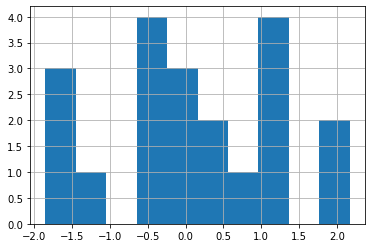

In [102]:
arr.hist() # bins=10 이 기본

전체 값의 범위를 4등분한 다음에 막대그래프를 그려보자.

In [103]:
factor = pd.cut(arr, bins=4)
factor

0       (0.158, 1.165]
1     (-1.859, -0.848]
2       (0.158, 1.165]
3       (0.158, 1.165]
4       (0.158, 1.165]
5       (1.165, 2.171]
6      (-0.848, 0.158]
7      (-0.848, 0.158]
8      (-0.848, 0.158]
9      (-0.848, 0.158]
10      (1.165, 2.171]
11      (0.158, 1.165]
12    (-1.859, -0.848]
13     (-0.848, 0.158]
14      (0.158, 1.165]
15    (-1.859, -0.848]
16      (1.165, 2.171]
17     (-0.848, 0.158]
18    (-1.859, -0.848]
19     (-0.848, 0.158]
dtype: category
Categories (4, interval[float64, right]): [(-1.859, -0.848] < (-0.848, 0.158] < (0.158, 1.165] < (1.165, 2.171]]

구간별 항목의 개수 확인

In [104]:
factor.value_counts()

(-0.848, 0.158]     7
(0.158, 1.165]      6
(-1.859, -0.848]    4
(1.165, 2.171]      3
dtype: int64

막대그래프 그리기

<AxesSubplot:>

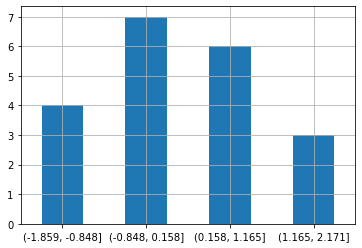

In [105]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

4등분한 구간에 라벨을 붙이면 정보를 보다 정확히 전달한다.

In [106]:
factor = pd.cut(arr, bins=4, labels=['A', 'B', 'C', 'D'])
factor

0     C
1     A
2     C
3     C
4     C
5     D
6     B
7     B
8     B
9     B
10    D
11    C
12    A
13    B
14    C
15    A
16    D
17    B
18    A
19    B
dtype: category
Categories (4, object): ['A' < 'B' < 'C' < 'D']

<AxesSubplot:>

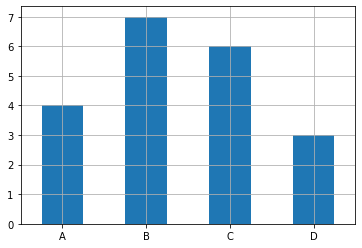

In [107]:
factor.value_counts().sort_index().plot.bar(rot=0, grid=True)

### 문자열 메서드 활용

참고

- [정규식](https://docs.python.org/3/library/re.html)
- [벡터와 문자열 메서드](https://pandas.pydata.org/docs/user_guide/text.html#text-string-methods)

`str` 속성은 모든 항목을 문자열로 변환한 벡터를 가리킨다.

In [108]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str

변환된 벡터에 문자열 메서드를 적용하면 새로운 시리즈가 생성된다.

In [109]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [110]:
df = pd.DataFrame(np.random.randn(3, 2), columns=[" Column A ", " Column B "], index=range(3))
df

Column A    Column B 
0   -0.982294    1.031269
1    0.491334   -0.446647
2   -0.806360    0.131268

열 라벨에 대해 문자열 메서드를 적용해보자.

- 소문자화

In [111]:
df.columns.str.lower()

Index([' column a ', ' column b '], dtype='object')

- 양끝의 공백 제거

In [112]:
df.columns.str.lower().str.strip()

Index(['column a', 'column b'], dtype='object')

- 중간에 위치한 공백을 밑줄(underscore)로 대체

In [113]:
df.columns.str.strip().str.lower().str.replace(" ", "_")

Index(['column_a', 'column_b'], dtype='object')